# Taller 4

Camilo Santiago Castillo Lasso

201412050
***


In [1]:
%pylab inline

import string
import matplotlib.cm as cm
import os
import random as rd
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from IPython.display import Markdown as md
import scipy.io.wavfile as waves

Populating the interactive namespace from numpy and matplotlib


# 12.1 Basics of Fourier Series and Fourier Transform

Ejercicio 1

$f(x)=exp(-\alpha x^2)$ 

$\hat{f}(k)=(\frac{1}{\sqrt{2\alpha}})exp(\frac{-k^2}{4\alpha})$

Text(0.5,1,'Shifted transform')

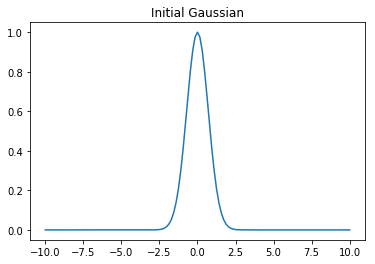

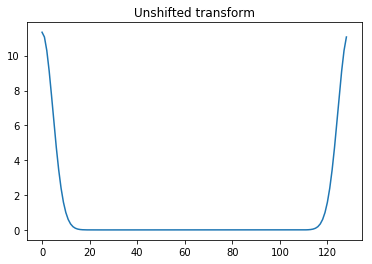

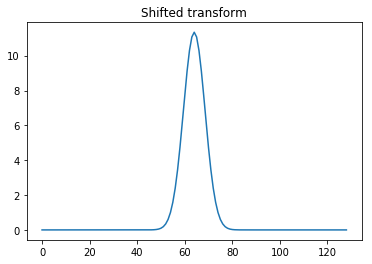

In [2]:
L=20
n=128
x2=linspace(-L/2,L/2,n+1)
x=x2[0:n+1]
u=exp(-x*x)
ut=fft.fft(u)
utshift=fftshift(ut)

figure()
plot(x,u)
title('Initial Gaussian')

figure()
plot(abs(ut))
title('Unshifted transform')

figure()
plot(abs(utshift))
title('Shifted transform')

Ejercicio 2

$u(x)=sech(x)$

$\frac{du}{dt}=-sech(x)tanh(x)$

$\frac{d^2u}{dt^2}=sech(x)-2sech^3(x)$

In [3]:
def sech(x):
    return 1/(cosh(x))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


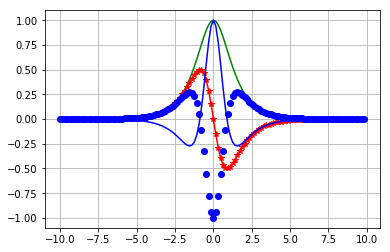

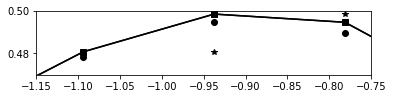

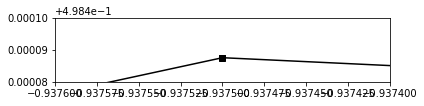

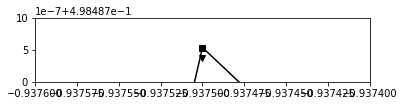

In [4]:
L=20
n=128
x2=linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx=x[1]-x[0]
u=sech(x)
ut=fft.fft(u)
ls1=linspace(0,n/2-1,n/2)
ls2=linspace(-n/2,-1,n/2)
ls=array(concatenate((ls1,ls2)))
k =(2j*pi/L)*ls

# calculo de derivadas con FFT
u=array(u)
ut1=k*ut
ut2=-k*k*ut
u1=fft.ifft(ut1).real
u2=fft.ifft(ut2).real

u1exact=[]
u2exact=[]

for i, x1 in enumerate(x):
    u1exact.append(-sech(x1)*math.tanh(x1))
    u2exact.append(sech(x1)-2*(sech(x1))**3)
u1exact=np.array(u1exact)
u2exact=np.array(u2exact)

#calculo de primera derivada por diferencias finitas
#segundo orden precision
ux=[]
a=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux.append(a)
for j in range(1,n-1):
    ux.append((u[j+1]-u[j-1])/(2*dx))
ux.append((-3*u[n-1]+4*u[n-2]-u[n-3])/(2*dx) )
ux=array(ux)

#Cuarto orde de presicion
ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))
for j in range(1,n-2):
    ux2.append((-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx))
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))
ux2=array(ux2)

#graficas
figure()
plot(x,u,'g',x,u1,'r',x,u1exact,'r*',x,u2,'b',x,u2exact,'bo')
grid(True)

plt.figure()
grid(True)
plt.subplot(3,1,1)
plt.plot(x,u1exact,'ks-')
plot(x,u1,'k')
plot(x,ux,'ko')
plot(x,ux2,'k*')
xlim(-1.15, -0.75)
ylim(0.47 ,0.5)
show()

plt.subplot(3,1,2)
plot(x,u1exact,'ks-')
plot(x,u1,'kv')
plot(x,ux,'ko')
plot(x,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.49848, 0.49850)
show()

plt.subplot(3,1,3)
plot(x,u1exact,'ks-')
plot(x,u1,'kv')
plot(x,ux,'ko')
plot(x,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.498487, 0.498488)
show()


# 12.2 FFT Application: Radar Detection and Filtering

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


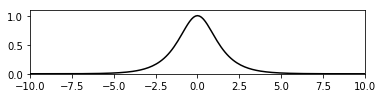

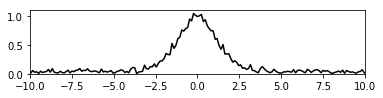

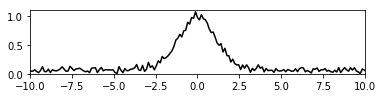

In [5]:
L=30
n=512
t2=linspace(-L,L,n+1)
t=t2[0:n]
ls1=linspace(0,n/2-1,n/2)
ls2=linspace(-n/2,-1,n/2)
ls=array(concatenate((ls1,ls2)))
k =(2*pi/(2*L))*ls
u=sech(t)

figure()
subplot(3,1,1)
plot(t,u,'k')
xlim(-10,10)
ylim(0,1.1)
show()

noise=1
ut=fft.fft(u)
real=[]
ima=[]
for i in range(0, n):
    real.append(random.randn())
    ima.append(random.rand()*1j)
real=array(real)
ima=array(ima)
utn=ut+noise*real+noise*ima

un=fft.ifft(utn)
subplot(3,1,2)
plot(t,abs(un),'k')
xlim(-10,10)
ylim(0,1.1)
show()

noise=1
ut=fft.fft(u)
real=[]
ima=[]
for i in range(0, n):
    real.append(random.randn())
    ima.append(random.randn()*1j)
real=array(real)
ima=array(ima)
unt=ut+noise*real+noise*ima

un=fft.ifft(unt)
subplot(3,1,3)
plot(t,abs(un),'k')
xlim(-10,10)
ylim(0,1.1)
show()

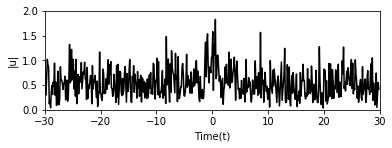

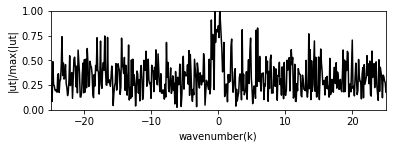

In [6]:
noise=10
ut=fft.fft(u)
real=[]
ima=[]
for i in range(0, n):
    real.append(random.randn())
    ima.append(random.randn()*1j)
real=array(real)
ima=array(ima)
unt=ut+noise*real+noise*ima
un=fft.ifft(unt)

figure()
subplot(2,1,1)
plot(t,abs(un),'k')
xlim(-30,30)
ylim(0,2)
xlabel('Time(t)')
ylabel('|u|')
show()

subplot(2,1,2)
plot(fft.fftshift(k),abs(fft.fftshift(unt))/max(abs(fft.fftshift(unt))),'k')
xlim(-25,25)
ylim(0,1)
xlabel('wavenumber(k)')
ylabel('|ut|/max(|ut|')
show()

Filtro Gaussiano:

$F(k)=exp(-\tau(k-k_0)^2)$

In [7]:
def filtro(k,m):
    return exp(-0.2*(k-m)**2)
        

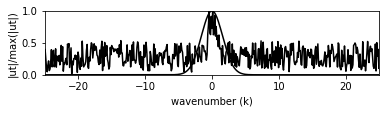

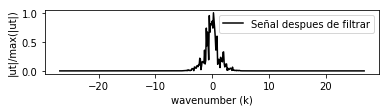

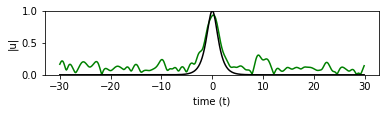

In [8]:
unft=filtro(k,0)*unt
unf=fft.ifft(unft)

noise=10
ut=np.fft.fft(filtro(k,0))
real=[]
ima=[]
for i in range(0,n):
    real.append(random.uniform(0,3))
    ima.append(1j*random.uniform(0,))
real=np.array(real)
ima=np.array(ima)
unt=ut+noise*(real)+noise*(ima)
un =fft.ifft(unt)

subplot(3,1,1)
plot(fft.fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
plot(fft.fftshift(k),abs(fftshift(filtro(k,0)))/max(abs(fftshift(filtro(k,0)))),'k')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
xlim(-25,25,5)
ylim(0,1)
show()

subplot(3,1,2)
plot(fftshift(k),abs(fftshift(unft))/max(abs(fftshift(unft))),'k',label='Señal despues de filtrar')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
legend(loc='best')
show()

subplot(3,1,3)
plot(t,abs(unf),'g')
plot(t,abs(u),'k')
xlabel('time (t)')
ylabel('|u|')
ylim(0,1)
show()

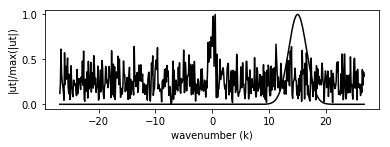

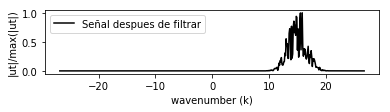

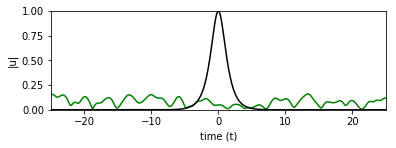

In [9]:
unft=filtro(k,15)*unt
unf=fft.ifft(unft)

noise=10
ut=np.fft.fft(filtro(k,15))
real=[]
ima=[]
for i in range(0,n):
    real.append(random.randn())
    ima.append(1j*random.randn())
real=np.array(real)
ima=np.array(ima)
unt=ut+noise*(real)+noise*(ima)
un =fft.ifft(unt)

subplot(2,1,1)
plot(fft.fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
plot(fft.fftshift(k),abs(fftshift(filtro(k,15)))/max(abs(fftshift(filtro(k,15)))),'k')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

subplot(3,1,2)
plot(fftshift(k),abs(fftshift(unft))/max(abs(fftshift(unft))),'k',label='Señal despues de filtrar')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
legend(loc='best')
show()

subplot(2,1,2)
plot(t,abs(unf),'g')
plot(t,u,'k')
xlabel('time (t)')
ylabel('|u|')
xlim(-25,25,5)
ylim(0,1)
show()

# 12.2 FFT Application: Radar Detection and Filtering

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


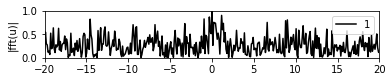

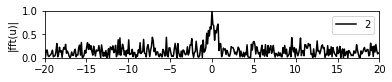

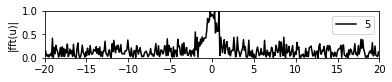

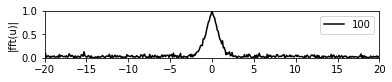

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:48: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


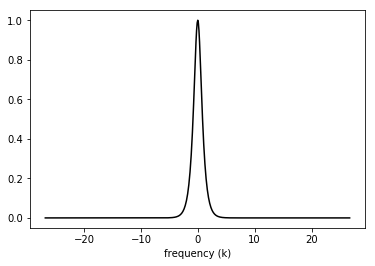

In [10]:
L=30
n=512
t2=linspace(-L,L,n+1)
t=t2[0:n]

ls1=linspace(0,n/2-1,n/2)
ls2=linspace(-n/2,-1,n/2)
ls=array(concatenate((ls1,ls2)))
k =(2*pi/(2*L))*ls

noise=10
labels=['(a)','(b)','(c)','(d)']
realize=[1,2, 5, 100]
ks=fftshift(k)
for jj, a in enumerate(realize):
    u=sech(t)
    utn=zeros((a,n))
    ave=zeros((1,n))
    ut=fft.fft(u)
    dato=zeros((a,n))
    un=zeros((a,n))
    
    for j in range(0,a):
        real=[]
        ima=[]
        for i in range(0,n):
            real.append(random.randn())
            ima.append(1j*random.randn())
        real=np.array(real)
        ima=np.array(ima)
        utn[j,:]=ut+noise*(real)+noise*(ima)
        ave=ave+utn[j,:]
        
        dato[j,:]=abs(fft.fftshift(utn[j,:]))/(max(abs(utn[j,:])))
        un[j,:] =fft.ifft(utn[j,:])
    ave=abs(fft.fftshift(ave))/a
    
    subplot(4,1,jj+1)
    plot(ks,ave[0,:]/max(ave[0,:]),'k',label=a)
    
    xlim(-20,20)
    ylim(0,1)
    
    legend(loc='upper right')
    ylabel('|fft(u)|')
    show()

hold(True)
plot(ks,abs(fft.fftshift(ut))/max(abs(ut)),'k')
xlabel('frequency (k)')
show()
    

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'extende3d'
  s)


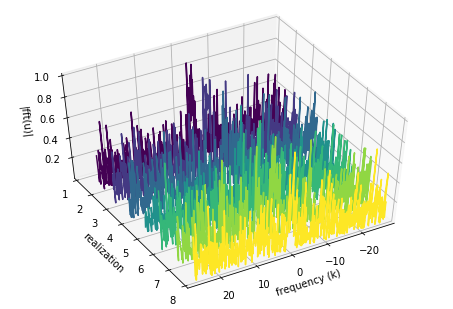

In [11]:

axes=Axes3D(figure())
b=zeros((8,n))

y=linspace(1,9,9)
X,Y=meshgrid(ks,y)
c=axes.contour(X,Y,dato[0:9,:],zdir='y',extende3d=False)
xlabel('frequency (k)')
ylabel('realization')
xlim(-28,28)
ylim(1,8)
axes.set_zlabel('|fft(u)|')
axes.view_init(50,-300)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1714: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[which_pt] = np.array(ps2[i1]) - np.array(ps2[i2])
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1715: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[which_pt] = np.array(ps2[i2]) - np.array(ps2[i3])
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python

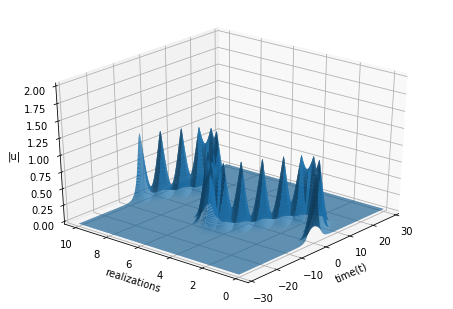

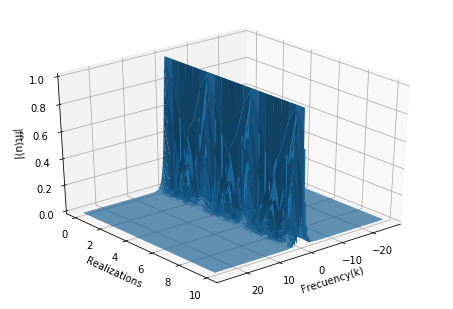

In [12]:
slice=linspace(0,10,20)
[T,S]=meshgrid(t,slice)
[K,S]=meshgrid(k,slice)

U=sech(T-10*sin(S))*exp(1j*0*T)
#subplot(2,1,1)
axes=Axes3D(figure())
axes.plot_surface(T,S,U,rstride=1,cstride=1)
xlabel('time(t)')
ylabel('realizations')
axes.set_zlabel('|u|')
xlim([-30,30])
axes.set_zlim(0,2)
axes.view_init( 30,-500)

Ut=zeros((20,512))
Kp=zeros((20,512))
Utp=zeros((20,512))
Utn=zeros((20,512))
Utnp=zeros((20,512))
Un=zeros((20,512))
for z in range(0,len(slice)):
    real=[]
    ima=[]
    for i in range(0,n):
         real.append(random.randn())
         ima.append(1j*random.randn())
    real=array(real)
    ima=array(ima)
    Ut[z,:] =fft.fft(U[z,:])
    Kp[z,:]=fft.fftshift(K[z,:])
    Utp[z,:] =fft.fftshift(Ut[z,:])
    Utn[z,:]= Ut[z,:] + noise*(real+ima)
    Utnp[z,:]=fft.fftshift(Utn[z,:])/(max(abs(Utn[z,:])))
    Un[z,:]=fft.ifft(Utn[z,:])
    

#subplot(2,1,2)
ax=Axes3D(figure())
ax.plot_surface(Kp,S, abs(Utp)/max(Utp[0,:]),rstride=1, cstride=1)
xlabel('time(t)')
ylabel('realizations')
ax.set_zlabel('|fft(u)|')
xlim([-28,28])
ax.set_zlim(0,1)
xlabel('Frecuency(k)')
ylabel('Realizations')
ax.view_init( 30,50)

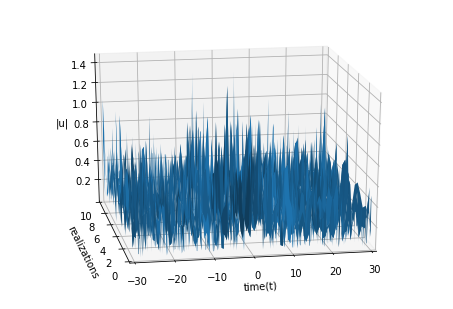

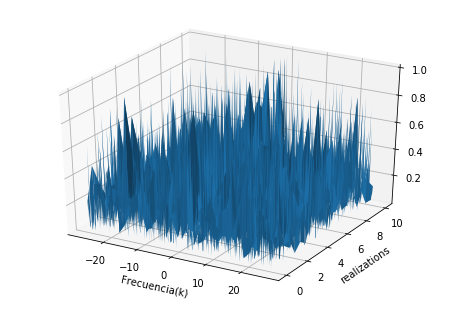

In [13]:
#subplot(2,1,1)
axes=Axes3D(figure())
axes.plot_surface(T,S,abs(Un), rstride=8,cstride=8)
xlabel('time(t)')
ylabel('realizations')
xlim(-30,30)
ylim(0,10)
axes.set_zlabel('|u|')
axes.view_init( 20,-100)
show()


#subplot(2,1,2)
ax=Axes3D(figure())
ax.plot_surface(Kp,S, abs(Utnp))
xlabel('Frecuencia(k)')
ylabel('realizations')
axes.set_zlabel('|fft(u)|')
show()

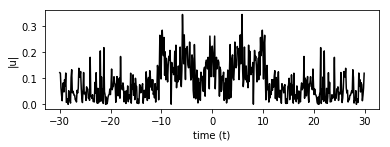

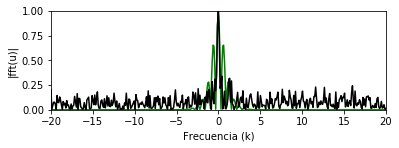

In [14]:
figure()
Uz = zeros((1,n))    
Utz= zeros((1,n))
for i in range(0,len(slice)):
    Uz= Uz+Un[i,:]
    Utz=Utz+Utn[i,:]
Uz=Uz/len(slice)
Utz=fftshift(Utz)/len(slice)

subplot(2,1,1)
plot(t,abs(Uz[0,:]),'k')
xlabel('time (t)')
ylabel('|u|')
show()
 
subplot(2,1,2)
plot(ks,abs(fftshift(Ut[1,:]))/max(abs(Ut[1,:])),'g-')
#hold(True)
plot(ks,abs(Utz[0,:])/max(abs(Utz[0,:])),'k-')
xlim(-20,20)
ylim(0,1)
xlabel('Frecuencia (k)')
ylabel('|fft(u)|')
show()

# Ejercicio personal

Para este ejemplo se filtrara la voz de la cancion Everlong (acustica) de Foo Fighters

-
Se hizo uso de: 

- Scipy.fft
- Scipy.waves
- Butter pasabandas

In [15]:
archivo ='Foo  Fighters - Everlong (Acoustic)).wav'
samples,sound=waves.read(archivo)


FileNotFoundError: [Errno 2] No such file or directory: 'Foo  Fighters - Everlong (Acoustic)).wav'